# DFT Helio

In [135]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [136]:
# Definición del Potencial

def Vpot(x):
    #return ( (x-5)**2 )/ 2.0
    return -1/x

In [137]:
def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]

## Hago un grid logaritmico 

$ r_j = r_p[exp(j\delta) - 1] \qquad , \qquad j = 0,1,\cdots,j_{max} $

$ r_p = r_{max}/[exp(j_{max}\delta) - 1] $

<function matplotlib.pyplot.show>

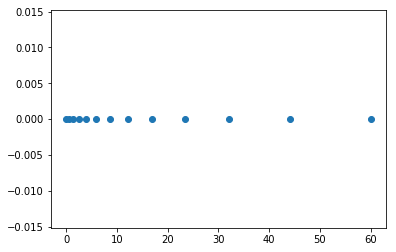

In [127]:
# Hago un grid logaritmico 

r_min = 0.01
r_max = 60
j_max = 12 #Cantidad de puntos totales
delta = 0.3 # Controla el espaciamiento relativo

r_p = r_max/(np.exp(j_max*delta)-1)

#x = np.linspace(r_min,r_max,j_max)
j = np.linspace(0,j_max,j_max+1) # j va de 0 a j_max

plt.scatter( r_p*(np.exp(j*delta)-1),0*j )
plt.show

phi(r=0)= 0.0099007921306993
norm= 0.2500185825487631


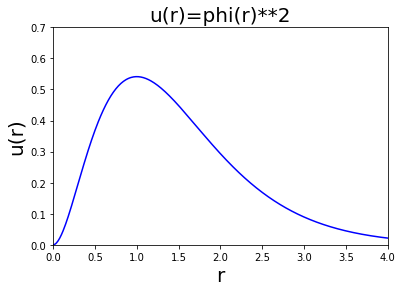

In [248]:
# Valores iniciales de phi(x) y phi'(x)

r_max = 10.0
initialY = r_max*np.exp(-r_max),(1.0-r_max)*np.exp(-r_max)

# Valor tentativo de E (para el atomo de Hidrogeno)
E = -0.5

x = np.linspace(r_max,0.01,1000) # Integro de derecha a izquierda

# Solucion ecuación diferencial
sol = odeint(g,initialY,x,(E,))
print('phi(r=0)=',sol[999,0])

norm = sp.integrate.simps(sol[:,0]**2,x)
print('norm=',-norm)

# Ploteo la solución (la densidad, phi cuadrado, normalizada)
plt.plot(x, (sol[:,0]**2)/-norm, color='b')
plt.axis([0, 4, 0,0.7])
#plt.plot(x,Vpot(x),color='k') # Plotea el potencial

plt.title('u(r)=phi(r)**2',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('u(r)',fontsize=20)
plt.show()


## Incluyo el potencial de Hartree

### Tengo que resolver la ecuacion

$ U''(r) = -\cfrac{u^2(r)}{r} $

$ U(0) = 0 $

$ U(r_{max}) = q_{max} $

$ U(r) = r V_H(r) $

$ n(r) = \sum_k \vert \psi_k(r)\vert^2 $ 

In [249]:
# Definición de la funcion densidad u(x)
# Uso de base las funciones hidrogenicas

def u(x):
    #return ( (x-5)**2 )/ 2.0
    return 2*x*np.exp(-x)

In [250]:
def h(y, x):
    return [y[1],-(u(x)**2/x)*y[0]]

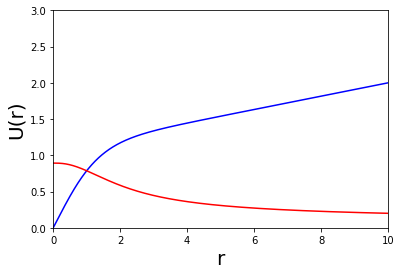

In [326]:
# Valores iniciales de U(x) y U'(x)

r_max = 10.0
q_max = 2.0 # Carga total para el Helio
initialY = 0.0001,1.0

# Valor tentativo de E (para el atomo de Hidrogeno)
#E = -0.5

x = np.linspace(0.0001,r_max,1000) # Integro de izquierda a derecha

# Solucion ecuación diferencial
sol = odeint(h,initialY,x)

alpha = (q_max-sol[1000-1,0])/r_max

# Ploteo la solución (la densidad, phi cuadrado, normalizada)
plt.plot(x, sol[:,0]+alpha*x, color='b')
plt.plot(x, (sol[:,0]+alpha*x)/x, color='r')
#plt.plot(x,1-(x+1)*np.exp(-2*x),color='r')
plt.axis([0, 10, 0,3])
#plt.plot(x,Vpot(x),color='k') # Plotea el potencial

#plt.title('U(r)=phi(r)**2',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('U(r)',fontsize=20)

plt.show()

In [329]:
# Itero la cosa

def Vpot(x):
    #return ( (x-5)**2 )/ 2.0
    return -1/x + V_H

def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]


(sol[:,0]+alpha*x)/x

sol_bis = odeint(relat ,initialY,x) 
alpha = (q_max-sol[1000-1,0])/r_max
plt.plot(x, sol[:,0]+alpha*x, color='b')

plt.axis([0, 10, 0,3])
plt.xlabel('r',fontsize=20)
plt.ylabel('U(r)',fontsize=20)


NameError: name 'relat' is not defined